In [1]:
import pandas as pd

In [53]:
df = pd.read_csv("datasets\\credit_scoring_sample.csv")
df = df.dropna()

In [54]:
df_x = df.drop(['NumberOfTimes90DaysLate'], axis=1)
df_y = df[['NumberOfTimes90DaysLate']]

In [55]:
from sklearn.decomposition import PCA

In [56]:
pca = PCA(n_components=4)
pca.fit(df_x)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [57]:
df_x = pd.DataFrame(pca.transform(df_x))

In [58]:
from sklearn.cluster import KMeans, DBSCAN

In [59]:
clustering = KMeans(n_clusters=5)
clustering.fit(df_x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [60]:
df_x['cluster'] = clustering.labels_
df_y['cluster'] = clustering.labels_

C:\Users\KindYAK\Anaconda3\envs\def\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


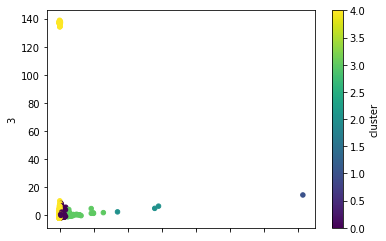

In [34]:
df_x.plot.scatter(0, 3, c="cluster", colormap='viridis')

In [66]:
from sklearn.linear_model import LogisticRegression
clfs = []
for i in range(5):
    try:
        clf = LogisticRegression()
        clf.fit(df_x[df_x['cluster'] == i], df_y[df_y['cluster'] == i]['NumberOfTimes90DaysLate'])
        clfs.append(clf)
    except:
        pass

C:\Users\KindYAK\Anaconda3\envs\def\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KindYAK\Anaconda3\envs\def\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\KindYAK\Anaconda3\envs\def\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KindYAK\Anaconda3\envs\def\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KindYAK\Anaconda3\envs\def\lib\site-packages\sklearn\linear_model\logistic.py:432: Futur

In [68]:
len(clfs)

3